In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# analise exploratoria dos dados

#limpeza dos dados


#https://www.kaggle.com/competitions/titanic/overview

test= pd.read_csv('test.csv')
train= pd.read_csv('train.csv')

train_index= len(train)
test_index= len(test)-len(train)


In [307]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [308]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [309]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [310]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [311]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [312]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [382]:
passengerid= test['PassengerId']
print(passengerid)
titanictotal = pd.concat([train, test], ignore_index=True)

train_index= len(train)
test_index= len(test)-len(train)

891      419
892      420
893      421
894      422
895      423
        ... 
1777    1305
1778    1306
1779    1307
1780    1308
1781    1309
Name: PassengerId, Length: 891, dtype: int64


In [383]:
titanictotal

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1777,1305,NaN,3,"Spector, Mr. Woolf",0,25.962264,0,0,A.5. 3236,8.0500,NaN,S
1778,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C
1779,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1780,1308,NaN,3,"Ware, Mr. Frederick",0,25.962264,0,0,359309,8.0500,NaN,S


In [315]:
titanictotal.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [316]:
df= pd.DataFrame()

In [317]:
titanictotal.drop(['Ticket','Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

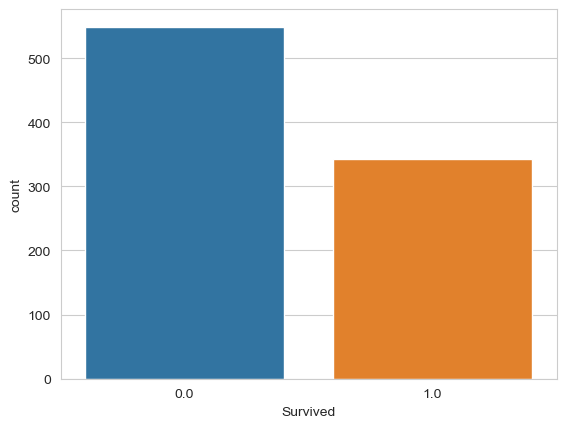

In [318]:
sns.countplot(data= titanictotal, x='Survived')

#mais mortes do que sobreviventes

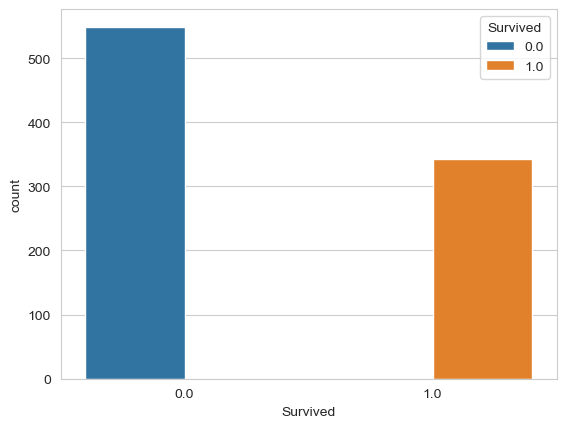

In [319]:
def titanic_fun(data, column , count=True):

    if count == True:
        sns.countplot(data=data, x= column, hue='Survived')
    else:
        sns.displot(data[column], kde= True)
        

titanic_fun(titanictotal, 'Survived')

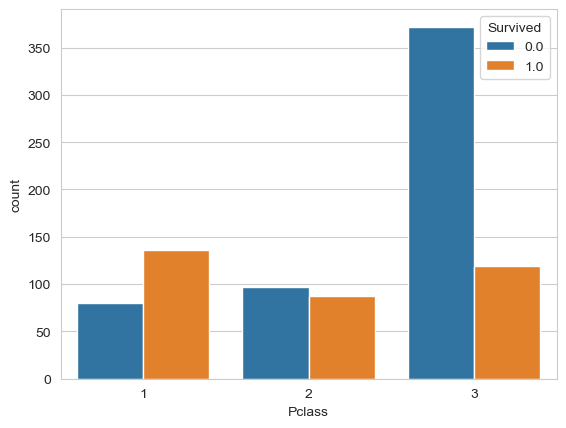

In [320]:
titanic_fun(titanictotal,'Pclass')

In [321]:
titanictotal['Sex']= titanictotal['Sex'].replace(['male','female'],[0,1])


In [322]:
titanictotal


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


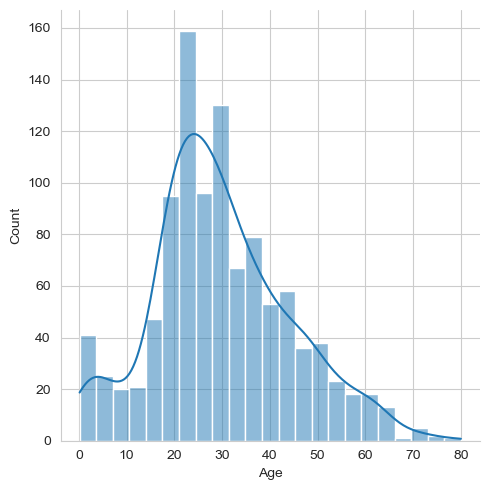

In [323]:
titanic_fun(titanictotal,'Age', False)

In [324]:
titanictotal.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.408106,0.060832,0.018322,-0.558629
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.063645,0.109609,0.213125,0.185523
Age,0.028814,-0.077221,-0.408106,-0.063645,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,0.213125,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.185523,0.178740,0.160238,0.221539,1.000000


In [325]:
titanictotal.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex
1       0      41.029272
        1      37.037594
2       0      30.815380
        1      27.499223
3       0      25.962264
        1      22.185329
Name: Age, dtype: float64

In [326]:
# se tivesse muitas variaveis poderia usar o for i in...

for i in sorted(titanictotal["Pclass"].unique()):
    print(f'A média de idade das pessoas da classe {i} é = {titanictotal[titanictotal["Pclass"]== i]["Age"].mean()}')

A média de idade das pessoas da classe 1 é = 39.15992957746479
A média de idade das pessoas da classe 2 é = 29.506704980842912
A média de idade das pessoas da classe 3 é = 24.81636726546906


In [327]:
titanictotal['Age'].mean()


29.881137667304014

In [328]:
titanictotal.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [329]:
age_mean = titanictotal.groupby(['Pclass', 'Sex'])['Age'].mean()

for i in range(len(titanictotal)):
    if pd.isnull(titanictotal.at[i, 'Age']):
        titanictotal.at[i, 'Age'] = age_mean[titanictotal.at[i, 'Pclass'], titanictotal.at[i, 'Sex']]
    

In [330]:
print(age_mean)

Pclass  Sex
1       0      41.029272
        1      37.037594
2       0      30.815380
        1      27.499223
3       0      25.962264
        1      22.185329
Name: Age, dtype: float64


In [331]:
titanictotal.head(55)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",0,25.962264,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,C


In [332]:
agrup_1 =titanictotal.groupby(['Pclass','Sex'])['Age'].median()
agrup_2 = titanictotal.groupby(['Sex','Survived'])['PassengerId'].count().reset_index()
agrup_3= titanictotal.groupby(['Sex','Pclass'])['Survived'].count().reset_index()
print(agrup_1)
print(agrup_2)
print(agrup_3)

Pclass  Sex
1       0      41.029272
        1      37.018797
2       0      30.000000
        1      27.499223
3       0      25.962264
        1      22.185329
Name: Age, dtype: float64
   Sex  Survived  PassengerId
0    0       0.0          468
1    0       1.0          109
2    1       0.0           81
3    1       1.0          233
   Sex  Pclass  Survived
0    0       1       122
1    0       2       108
2    0       3       347
3    1       1        94
4    1       2        76
5    1       3       144


In [333]:
titanictotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


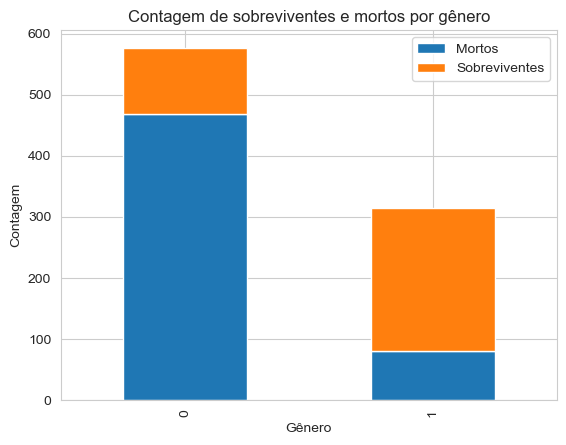

In [334]:
pivot = agrup_2.pivot(index='Sex', columns='Survived', values='PassengerId')
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Contagem de sobreviventes e mortos por gênero')
plt.legend(['Mortos', 'Sobreviventes'])
plt.show()


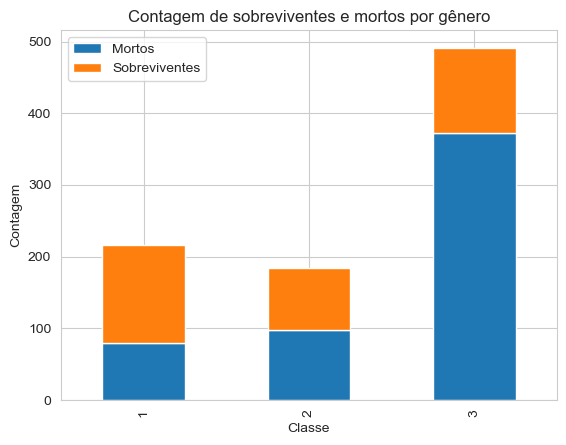

In [335]:
agrup_4 = titanictotal.groupby(['Pclass','Survived'])['PassengerId'].count().reset_index()
pivot = agrup_4.pivot(index='Pclass', columns='Survived', values='PassengerId')
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Contagem de sobreviventes e mortos por gênero')
plt.legend(['Mortos', 'Sobreviventes'])
plt.show()

In [336]:
cross_tab = pd.crosstab(index=[titanictotal["Pclass"]], columns=[titanictotal["Sex"], titanictotal["Survived"]], margins=True)
cross_tab_percent = cross_tab.div(cross_tab["All"], axis=0)
cross_tab_percent = cross_tab_percent * 100

display(cross_tab)
display(cross_tab_percent)
# 0 é male e 1 é Female e 0 Morre e 1 Sobrevive

Sex         0        1       All
Survived  0.0  1.0 0.0  1.0     
Pclass                          
1          77   45   3   91  216
2          91   17   6   70  184
3         300   47  72   72  491
All       468  109  81  233  891

Sex               0                     1               All
Survived        0.0        1.0        0.0        1.0       
Pclass                                                     
1         35.648148  20.833333   1.388889  42.129630  100.0
2         49.456522   9.239130   3.260870  38.043478  100.0
3         61.099796   9.572301  14.663951  14.663951  100.0
All       52.525253  12.233446   9.090909  26.150393  100.0

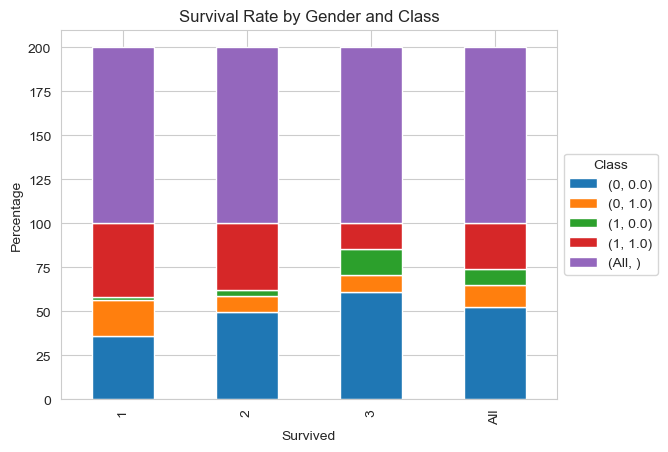

In [337]:
cross_tab_percent.plot(kind='bar', stacked=True)
plt.legend(title="Class", loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Survived")
plt.ylabel("Percentage")
plt.title("Survival Rate by Gender and Class")
plt.show()

In [338]:
titanictotal.isnull().sum()


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [339]:
agrup_5= titanictotal.groupby(['Sex','Pclass'])['Survived'].count()

print(agrup_5)


Sex  Pclass
0    1         122
     2         108
     3         347
1    1          94
     2          76
     3         144
Name: Survived, dtype: int64


In [340]:

titanictotal.drop("Embarked", axis=1)

display(titanictotal)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,25.962264,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",0,25.962264,0,0,359309,8.0500,NaN,S


In [389]:
train_index= len(train)
test_index= len(test)-len(train)

train = titanictotal[:train_index].copy()
test = titanictotal[test_index:].copy()

train['Survived'] = train['Survived'].astype(int)

X = train.drop(['Survived','Ticket', 'Name', "Cabin", 'Embarked'], axis = 1)
y = train['Survived']

X_test = test.drop('Survived', axis = 1)

display(X)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,3,1,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,3,1,22.185329,1,2,23.4500
889,890,1,0,26.000000,0,0,30.0000


In [342]:
def func_acuracia(algoritmo, X_train, y_train, vc):
    modelo= algoritmo.fit(X_train,y_train)
    acuracia=round(modelo.score(X_train,y_train)*100,2)
    
    train_pred= model_selection.cross_val_predict(algoritmo, X_train,y_train, cv=vc, n_jobs=-1)
    acuracia_vc= round(metrics.accuracy_score(y_train, train_pred)*100,2)
    
    return acuracia, acuracia_vc

In [343]:
#Randm Forest

acc_rf, acc_vc_rf = func_acuracia(RandomForestClassifier(), X, y,10)

print(f"acuracia: {acc_rf}")
print(f"acuracia validação cruzada: {acc_vc_rf}")

acuracia: 100.0
acuracia validação cruzada: 82.38


In [344]:
# logistic Reg.

acc_log, acc_vc_log = func_acuracia(LogisticRegression(max_iter=1000), X, y,10)

print(f"acuracia: {acc_log}")
print(f"acuracia validação cruzada: {acc_vc_log}")

acuracia: 80.92
acuracia validação cruzada: 80.02


In [345]:
# Knearest

acc_knn, acc_vc_knn = func_acuracia(KNeighborsClassifier(), X, y,10)

print(f"acuracia: {acc_knn}")
print(f"acuracia validação cruzada: {acc_vc_knn}")

acuracia: 75.08
acuracia validação cruzada: 50.51


In [346]:
# Gaussian

acc_gau, acc_vc_gau = func_acuracia(GaussianNB(), X, y,10)

print(f"acuracia: {acc_gau}")
print(f"acuracia validação cruzada: {acc_vc_gau}")

acuracia: 79.24
acuracia validação cruzada: 78.9


In [347]:
#linear support Vector Machines SVC

acc_svc, acc_vc_svc = func_acuracia(LinearSVC(dual= False), X, y,10)

print(f"acuracia: {acc_svc}")
print(f"acuracia validação cruzada: {acc_vc_svc}")

acuracia: 80.58
acuracia validação cruzada: 79.91


In [348]:
# Stocastic

acc_sts, acc_vc_sts = func_acuracia(SGDClassifier(), X, y,10)

print(f"acuracia: {acc_sts}")
print(f"acuracia validação cruzada: {acc_vc_sts}")

acuracia: 39.28
acuracia validação cruzada: 62.18


In [349]:
# Decision Tree

acc_tree, acc_vc_tree = func_acuracia(DecisionTreeClassifier(), X, y,10)

print(f"acuracia: {acc_tree}")
print(f"acuracia validação cruzada: {acc_vc_tree}")

acuracia: 100.0
acuracia validação cruzada: 73.18


In [350]:
#gradient 

acc_gbt, acc_vc_gbt= func_acuracia(GradientBoostingClassifier(), X, y,10)

print(f"acuracia: {acc_gbt}")
print(f"acuracia validação cruzada: {acc_vc_gbt}")

acuracia: 90.35
acuracia validação cruzada: 79.69


In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=89)

In [352]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [353]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [354]:
y_pred = rfc.predict(X_test)

In [355]:
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracy)

Acurácia: 0.8100558659217877


In [394]:
test.reset_index(drop=True, inplace=True)
preditivo = rfc.predict(X_test)
print(X_test)

     PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare
291          292       1    1  19.0      1      0   91.0792
366          367       1    1  60.0      1      0   75.2500
14            15       3    1  14.0      0      0    7.8542
463          464       2    0  48.0      0      0   13.0000
314          315       2    0  43.0      1      1   26.2500
..           ...     ...  ...   ...    ...    ...       ...
634          635       3    1   9.0      3      2   27.9000
618          619       2    1   4.0      2      1   39.0000
577          578       1    1  39.0      1      0   55.9000
380          381       1    1  42.0      0      0  227.5250
500          501       3    0  17.0      0      0    8.6625

[446 rows x 7 columns]


In [390]:
kaggle=pd.DataFrame({'PassengerId': passengerid, 'Survived': preditivo})

ValueError: array length 179 does not match index length 891

In [361]:
kaggle['Sex'] = titanictotal.loc[titanictotal['PassengerId'].isin(passengerid), 'Sex'].values
kaggle['Pclass'] = titanictotal.loc[titanictotal['PassengerId'].isin(passengerid), 'Pclass'].values
kaggle['Age'] = titanictotal.loc[titanictotal['PassengerId'].isin(passengerid), 'Age'].values

# criar uma nova coluna 'Survived' com base nos valores previstos y_pred
kaggle['Survived'] = y_pred

# exibir o DataFrame kaggle
print(kaggle)

ValueError: Length of values (418) does not match length of index (891)